## PASO 0 EXTRACCION DE DATOS (df_v0)

In [1]:
#REALIZAMOS LA EXTRACCION DE DATOS
import pandas as pd
df_v0 = pd.read_csv('Practica insurance_claims.csv',na_values ="?")

df_v0

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [2]:
#COMPROBAMOS LOS DATOS ÚNICOS DE TODAS LAS COLUMNAS
df_v0.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

## PASO 1 TRAS ANALIZAR CADA VARIABLE SEGUIRÉ LAS SIGUIENTES MODIFICACIONES PARA CADA VARIABLE:
    
    months_as_customer              391 -> C1: agrupar en grupos de 5 años
    age                              46 -> C1: Agrupar en grupos de 5 en cinco años
    policy_number                  1000 -> Eliminar
    policy_bind_date                951 -> Eliminar
    policy_state                      3 -> OneHotEncoder
    policy_csl                        3 -> OneHotEncoder
    policy_deductable                 3 -> OneHotEncoder
    policy_annual_premium           991 -> Kbins discretizer
    umbrella_limit                   11 -> OneHotEncoder
    insured_zip                     995 -> Eliminar
    insured_sex                       2 -> OneHotEncoder
    insured_education_level           7 -> LabelEncoder
    insured_occupation               14 -> LabelEncoder
    insured_hobbies                  20 -> LabelEncoder
    insured_relationship              6 -> LabelEncoder
    capital-gains                   338 -> Kbins discretizer
    capital-loss                    354 -> Kbins discretizer
    incident_date                    60 -> Convertir a día de la semana
    incident_type                     4 -> OneHotEncoder
    collision_type                    3 -> C1: SimpleImputer(mostfrecuent), C2: SimpleImputer(value), OneHotEncoder
    incident_severity                 4 -> OneHotEncoder
    authorities_contacted             5 -> OneHotEncoder
    incident_state                    7 -> OneHotEncoder
    incident_city                     7 -> OneHotEncoder
    incident_location              1000 -> Eliminar
    incident_hour_of_the_day         24 -> Convertir en rangos horarios
    number_of_vehicles_involved       4 -> Nada
    property_damage                   2 -> C1: SimpleImputer(mostfrecuent), C2: SimpleImputer(value),OneHotEncoder
    bodily_injuries                   3 -> Nada
    witnesses                         4 -> Nada
    police_report_available           2 -> C1: SimpleImputer(mostfrecuent), C2: (value), OneHotEncoder
    total_claim_amount              763 -> Kbins discretizer
    injury_claim                    638 -> Kbins discretizer
    property_claim                  626 -> Kbins discretizer
    vehicle_claim                   726 -> Kbins discretizer
    auto_make                        14 -> LabelEncoder
    auto_model                       39 -> LabelEncoder
    auto_year                        21 -> LabelEncoderc
    fraud_reported                    2 -> LabelEncoder

## PASO 2 CREACIÓN DE NUEVAS VARIABLES Y POSTERIOR CODIFICACIÓN A CATEGÓRICO (df_v01)

In [3]:
from datetime import datetime as dt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

#TODAS LAS NUEVAS COLUMNAS SE CREARAN Y AÑADIRAN EN EL NUEVO DATAFRAME df_v01
df_v01 = pd.DataFrame()

#AGRUPAMOS EDADES DE 5 EN 5 en la columna "age"
df_v01["age_TOAGEGROUP"]=np.floor(df_v0["age"].values/5).astype(int)

#CONVERTIMOS MESES COMO CLIENTES EN AÑOS COMO CLIENTES en la columna "months_as_customer"
df_v01["months_as_customer_TOYEAR"]=np.floor(df_v0["months_as_customer"].values/12).astype(int)


#CONVERTIMOS EL DÍA DE INCIDENTE EN DÍA DE LA SEMANA  en la columna 'incident_date'
df_v01['incident_date_TOWEEKDAY'] = pd.to_datetime(df_v0['incident_date'], yearfirst=True).dt.dayofweek

#CONVERTIMOS LA HORA DEL DÍA EN LA PARTE DEL DÍA en la columna "incident_hour_of_the_day"
df_v01["incident_hour_of_the_day_TOPARTOFTHEDAY"] = df_v0["incident_hour_of_the_day"]
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df_v01["incident_hour_of_the_day_TOPARTOFTHEDAY"] = pd.cut(df_v01["incident_hour_of_the_day_TOPARTOFTHEDAY"], bins=b, labels=l, include_lowest=True)


#CREAMOS COLUMNAS CON VALORES IMPUTADOS COMO CATEGORÍA DESCONOCIDO

fill_na_mean = lambda x : x.fillna("UNKNOWN")
# df.transform(fill_na_mean)

df_v01["collision_type_TOUNKNOWNIMP"] = df_v0["collision_type"].transform(fill_na_mean)
df_v01["property_damage_TOUNKNOWNIMP"] = df_v0["property_damage"].transform(fill_na_mean)
df_v01["police_report_available_TOUNKNOWNIMP"] = df_v0["police_report_available"].transform(fill_na_mean)


#CODIFICAMOS CON ORDINAL ENCODER
codificar = ["collision_type_TOUNKNOWNIMP","property_damage_TOUNKNOWNIMP","police_report_available_TOUNKNOWNIMP","incident_hour_of_the_day_TOPARTOFTHEDAY"]
for columnas in codificar:
    oe = OrdinalEncoder()
    df_v01[columnas] = oe.fit_transform(df_v01[[columnas]])


## PASO 3 CODIFICACION DE LAS VARIABLES (df_v03) DEL DATASET ORIGINAL

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
df_v03 = df_v0.copy()

#DEBIDO A QUE EL COLUMNTRANSFORMER NOS DESCOMPONE EL DATAFRAME,
#PROCEDEMOS AL PREPROCESADO MANUAL DE LAS COLUMNAS

#COLUMNAS DE VALORES CONTÍNUOS A DISCRETIZAR
discretizar = ["vehicle_claim","property_claim","injury_claim",
               "total_claim_amount","capital-loss",
               "capital-gains","policy_annual_premium"]
for columnas in discretizar:
    kb = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='kmeans')
    df_v03[columnas] = kb.fit_transform(df_v03[[columnas]])

#COLUMNAS DE VALORES CATEGÓRICOS A ETIQUETAR NUMERICAMENTE    
listaOE = ['auto_year',"auto_model","auto_make","insured_relationship",
       "insured_hobbies","insured_occupation","insured_education_level",
          "incident_city","incident_state","authorities_contacted","incident_severity",
           "collision_type","incident_type","insured_sex","umbrella_limit","policy_deductable",
          "policy_csl","policy_state","police_report_available", "property_damage","fraud_reported"]

for columnas in listaOE:
    oe = OrdinalEncoder()
    df_v03[columnas] = oe.fit_transform(df_v03[[columnas]])

#COLUMNAS DE CON VALORES A IMPUTAR (MODA) 
imputar = ['collision_type',"property_damage","police_report_available"]
for columnas in listaOE:
    si = SimpleImputer(strategy="most_frequent")
    df_v03[columnas] = si.fit_transform(df_v03[[columnas]])
    
#COLUMNAS A ELIMINAR
eliminar = ["policy_number","incident_date","policy_bind_date","insured_zip","incident_location"]
for columnas in eliminar:
    df_v03.drop(columnas, axis=1, inplace=True)
    
df_v03

C:\Users\danny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  "KMeans is known to have a memory leak on Windows "
C:\Users\danny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  "KMeans is known to have a memory leak on Windows "
C:\Users\danny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  "KMeans is known to have a memory leak on Windows "
C:\Users\danny\anaconda3\

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2.0,1.0,1.0,3.0,1.0,1.0,4.0,2.0,...,2,1.0,4.0,2.0,4.0,4.0,10.0,1.0,9.0,1.0
1,228,42,1.0,1.0,2.0,2.0,5.0,1.0,4.0,6.0,...,0,0.0,0.0,0.0,0.0,0.0,8.0,12.0,12.0,1.0
2,134,29,2.0,0.0,2.0,3.0,5.0,0.0,6.0,11.0,...,3,0.0,1.0,2.0,1.0,1.0,4.0,30.0,12.0,0.0
3,256,41,0.0,1.0,2.0,3.0,6.0,0.0,6.0,1.0,...,2,0.0,3.0,2.0,2.0,3.0,3.0,34.0,19.0,1.0
4,228,44,0.0,2.0,1.0,4.0,6.0,1.0,0.0,11.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,31.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1.0,3.0,1.0,0.0,5.0,2.0,...,1,0.0,5.0,5.0,2.0,4.0,6.0,6.0,11.0,0.0
996,285,41,0.0,0.0,1.0,4.0,1.0,0.0,6.0,9.0,...,3,0.0,5.0,5.0,5.0,5.0,13.0,28.0,20.0,0.0
997,130,34,2.0,1.0,0.0,3.0,3.0,0.0,5.0,1.0,...,3,1.0,3.0,2.0,2.0,4.0,11.0,19.0,1.0,0.0
998,458,62,0.0,2.0,2.0,3.0,5.0,1.0,0.0,5.0,...,1,1.0,2.0,1.0,1.0,2.0,1.0,5.0,3.0,0.0


## SUMA DE LAS VARIABLES CREADAS Y LAS EXISTENTES (df_v04)
### (HAY VARIABLES QUE TIENEN DOBLE REPRESENTACIÓN: VARIABLE ORIGINAL Y TRANSFORMADA) 
## SEPARACIÓN VARIABLE DEPENDIENTE DE LAS INDEPENDIENTES

In [5]:
from sklearn.model_selection import train_test_split
df_v04 = pd.concat([df_v01,df_v03],axis=1)

#SEPARAMOS VARIABLES DEPENDIENTE E INDEPENDIENTES
y_df = df_v04["fraud_reported"]
X_df_v1 = df_v04.copy()
X_df_v1.drop(columns=['fraud_reported',], axis=1, inplace=True)

## PASO 4 EN EL SIGUIENTE PASO CREO UNA SERIE DE MÉTODOS PARA REALIZAR UN ONE HOT ENCODING SIN CARGARME EL DATASET Y APLICARLO A TODAS LAS VARIABLES CON 10 CATEGORÍAS O MENOS

In [6]:
#VAMOS A HACER CREAR UN DATASET ONE_HOT_ENCODER APLICANDO EL ONE_HOT A TODAS LAS CATEGORÍAS QUE 
#TENGAN MENOS DE 11 CATEGORÍAS
X_df_v2 = X_df_v1.copy()


#Lista de número de categorías distintas del dataSet original
uvs = X_df_v1.nunique().tolist()

#Apuntaré en las siguientes dos listas los índices de las columnas de tengan menos y mas/igual de 11 categorías
ncol = []
ncolinv = []
#Con el bucle relleno ambas listas
c = 0
for i in uvs:
    if i<=10:
        ncol.append(c)
    else:
        ncolinv.append(c)
    c+=1

#DataSet con variables de menos de 11 categorías
X_df_v2A=X_df_v2.iloc[:,ncol]

#DataSet con variables de mas de 10 categorías
X_df_v2B=X_df_v2.iloc[:,ncolinv]
    
#Defino el ONE_HOT_ENCODER casero que hemos fabricado para no cargarnos el dataframe
def createDummies(df, var_name):
    dummy =pd.get_dummies(df[var_name])
    df=df.drop(var_name,axis=1)
    df=pd.concat([df,dummy],axis=1)
    return(df)
    
#Debido a que esta pensado para usarse con objects o strings hago la transformación pertinente
listcol = X_df_v2A.columns.tolist()
X_df_v2A = X_df_v2A.astype(str)

#Aplico el ONE_HOT_ENCODER casero al dataSet de menos de 11 categorías
X_df_v2A = createDummies(X_df_v2A, listcol)

#Concateno el dataSet que tiene variables con mas de 11 categorías
X_df_v3 = pd.concat([X_df_v2A,X_df_v2B], axis = 1)
    

X_df_v3



,age_TOAGEGROUP_10,age_TOAGEGROUP_11,age_TOAGEGROUP_12,age_TOAGEGROUP_3,age_TOAGEGROUP_4,age_TOAGEGROUP_5,age_TOAGEGROUP_6,age_TOAGEGROUP_7,age_TOAGEGROUP_8,age_TOAGEGROUP_9,...,months_as_customer_TOYEAR,months_as_customer,age,umbrella_limit,insured_occupation,insured_hobbies,incident_hour_of_the_day,auto_make,auto_model,auto_year
0,0,0,0,0,0,0,0,0,0,1,...,27,328,48,1.0,2.0,17.0,5,10.0,1.0,9.0
1,0,0,0,0,0,0,0,0,1,0,...,19,228,42,5.0,6.0,15.0,8,8.0,12.0,12.0
2,0,0,0,0,0,1,0,0,0,0,...,11,134,29,5.0,11.0,2.0,7,4.0,30.0,12.0
3,0,0,0,0,0,0,0,0,1,0,...,21,256,41,6.0,1.0,2.0,5,3.0,34.0,19.0
4,0,0,0,0,0,0,0,0,1,0,...,19,228,44,6.0,11.0,2.0,20,0.0,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,1,0,0,...,0,3,38,1.0,2.0,13.0,20,6.0,6.0,11.0
996,0,0,0,0,0,0,0,0,1,0,...,23,285,41,1.0,9.0,17.0,23,13.0,28.0,20.0
997,0,0,0,0,0,0,1,0,0,0,...,10,130,34,3.0,1.0,3.0,4,11.0,19.0,1.0
998,0,0,1,0,0,0,0,0,0,0,...,38,458,62,5.0,5.0,0.0,2,1.0,5.0,3.0


## PASO 5 FASE DE APLICACIÓN DE MODELO DE DEEP LEARNING

### 5.1 Selección de variables con SelectKBest con el modelo: mutual_info_classif

In [157]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
X_df_3_1 = SelectKBest(mutual_info_classif, k=10).fit_transform(X_df_v3, y_df)

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### 5.2 Separación de variables dependientes e independientes

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_df_3_1, y_df, test_size=0.3, random_state=1)

### 5.3 Normalizado de variables dependientes e independientes

In [179]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

### 5.4 Modelado del modelo de feed forward neural network 

In [161]:



model = keras.Sequential()

num_neuronas = X_train.shape[1]
model.add(Dense(units=num_neuronas, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(units = np.round(0.5*num_neuronas), activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(units = np.round(0.25*num_neuronas), activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))




# model = keras.Sequential()

# num_neuronas = X_train.shape[1]
# model.add(Dense(units=num_neuronas, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units = np.round(30*num_neuronas), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units = np.round(30*num_neuronas), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model = keras.Sequential()
# model.add(tf.keras.layers.Flatten())
# model.add(layers.Dense(128, activation='sigmoid'))
# model.add(layers.Dense(128, activation='sigmoid'))
# model.add(layers.Dense(1, activation="sigmoid"))

### 5.5 Definición de la herramienta EarlyStopping 

In [162]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=200)

### 5.6 Definición de la  función de coste  Adam y compilado del modelo

In [163]:
optimizer = keras.optimizers.Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])

### 5.7 Definición de la  función de coste  Adam y compilado del modelo

In [164]:
from keras import backend as K
X_train1 = K.cast_to_floatx(X_train)
y_train1 = K.cast_to_floatx(y_train)

In [165]:
X_train1.shape

(700, 10)

In [166]:
X_train2 = np.asarray(X_train1)
y_train2 = np.asarray(y_train1)

### 5.8 Entrenamiento del modelo

In [167]:
model.fit(x=X_train2, 
          y=y_train2, 
          epochs=3000, 
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop]
         )

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 603us/sample - loss: 0.5446 - acc: 0.7614 - val_loss: 0.5437 - val_acc: 0.7333
Epoch 2/3000
700/700 [==============================] - 0s 158us/sample - loss: 0.5008 - acc: 0.7614 - val_loss: 0.5366 - val_acc: 0.7333
Epoch 3/3000
700/700 [==============================] - 0s 171us/sample - loss: 0.4815 - acc: 0.7786 - val_loss: 0.4894 - val_acc: 0.8000
Epoch 4/3000
700/700 [==============================] - 0s 133us/sample - loss: 0.4607 - acc: 0.7986 - val_loss: 0.5328 - val_acc: 0.7633
Epoch 5/3000
700/700 [==============================] - 0s 140us/sample - loss: 0.4392 - acc: 0.7986 - val_loss: 0.4822 - val_acc: 0.8000
Epoch 6/3000
700/700 [==============================] - 0s 136us/sample - loss: 0.4290 - acc: 0.8100 - val_loss: 0.4745 - val_acc: 0.8000
Epoch 7/3000
700/700 [==============================] - 0s 139us/sample - loss: 0.4301 - acc: 0.8143 - val_loss: 0.5422 - val_

Epoch 60/3000
700/700 [==============================] - 0s 133us/sample - loss: 0.4111 - acc: 0.8100 - val_loss: 0.4714 - val_acc: 0.7767
Epoch 61/3000
700/700 [==============================] - 0s 127us/sample - loss: 0.4158 - acc: 0.8100 - val_loss: 0.5079 - val_acc: 0.7767
Epoch 62/3000
700/700 [==============================] - 0s 127us/sample - loss: 0.4224 - acc: 0.8043 - val_loss: 0.5386 - val_acc: 0.7733
Epoch 63/3000
700/700 [==============================] - 0s 127us/sample - loss: 0.3994 - acc: 0.8129 - val_loss: 0.4723 - val_acc: 0.7767
Epoch 64/3000
700/700 [==============================] - 0s 131us/sample - loss: 0.4020 - acc: 0.8114 - val_loss: 0.4858 - val_acc: 0.7800
Epoch 65/3000
700/700 [==============================] - 0s 137us/sample - loss: 0.3993 - acc: 0.8129 - val_loss: 0.4724 - val_acc: 0.7800
Epoch 66/3000
700/700 [==============================] - 0s 134us/sample - loss: 0.4028 - acc: 0.8057 - val_loss: 0.4904 - val_acc: 0.7767
Epoch 67/3000
700/700 [====

Epoch 119/3000
700/700 [==============================] - 0s 132us/sample - loss: 0.4130 - acc: 0.8129 - val_loss: 0.5658 - val_acc: 0.7733
Epoch 120/3000
700/700 [==============================] - 0s 127us/sample - loss: 0.4116 - acc: 0.8157 - val_loss: 0.5169 - val_acc: 0.7700
Epoch 121/3000
700/700 [==============================] - 0s 127us/sample - loss: 0.4008 - acc: 0.8100 - val_loss: 0.5207 - val_acc: 0.7800
Epoch 122/3000
700/700 [==============================] - 0s 135us/sample - loss: 0.4123 - acc: 0.7986 - val_loss: 0.4993 - val_acc: 0.7367
Epoch 123/3000
700/700 [==============================] - 0s 137us/sample - loss: 0.4039 - acc: 0.8071 - val_loss: 0.4775 - val_acc: 0.7867
Epoch 124/3000
700/700 [==============================] - 0s 124us/sample - loss: 0.4022 - acc: 0.8186 - val_loss: 0.5045 - val_acc: 0.7767
Epoch 125/3000
700/700 [==============================] - 0s 122us/sample - loss: 0.4045 - acc: 0.8071 - val_loss: 0.5185 - val_acc: 0.7800
Epoch 126/3000
700/7

700/700 [==============================] - 0s 139us/sample - loss: 0.3899 - acc: 0.8129 - val_loss: 0.5503 - val_acc: 0.7533
Epoch 178/3000
700/700 [==============================] - 0s 128us/sample - loss: 0.3950 - acc: 0.8171 - val_loss: 0.5553 - val_acc: 0.7667
Epoch 179/3000
700/700 [==============================] - 0s 123us/sample - loss: 0.3902 - acc: 0.8143 - val_loss: 0.5534 - val_acc: 0.7467
Epoch 180/3000
700/700 [==============================] - 0s 124us/sample - loss: 0.4233 - acc: 0.8200 - val_loss: 0.4955 - val_acc: 0.7933
Epoch 181/3000
700/700 [==============================] - 0s 127us/sample - loss: 0.4325 - acc: 0.7429 - val_loss: 0.5565 - val_acc: 0.7333
Epoch 182/3000
700/700 [==============================] - 0s 130us/sample - loss: 0.3995 - acc: 0.7943 - val_loss: 0.4892 - val_acc: 0.7867
Epoch 183/3000
700/700 [==============================] - 0s 134us/sample - loss: 0.3929 - acc: 0.8129 - val_loss: 0.5823 - val_acc: 0.7800
Epoch 184/3000
700/700 [===========

700/700 [==============================] - 0s 137us/sample - loss: 0.3905 - acc: 0.8143 - val_loss: 0.4719 - val_acc: 0.7900
Epoch 236/3000
700/700 [==============================] - 0s 121us/sample - loss: 0.3801 - acc: 0.8171 - val_loss: 0.5721 - val_acc: 0.7833
Epoch 237/3000
700/700 [==============================] - 0s 133us/sample - loss: 0.3820 - acc: 0.8143 - val_loss: 0.6705 - val_acc: 0.7800
Epoch 238/3000
700/700 [==============================] - 0s 137us/sample - loss: 0.3924 - acc: 0.8143 - val_loss: 0.6386 - val_acc: 0.7767
Epoch 239/3000
700/700 [==============================] - 0s 124us/sample - loss: 0.3799 - acc: 0.8171 - val_loss: 0.5820 - val_acc: 0.7800
Epoch 240/3000
700/700 [==============================] - 0s 133us/sample - loss: 0.3885 - acc: 0.8129 - val_loss: 0.6354 - val_acc: 0.7800
Epoch 241/3000
700/700 [==============================] - 0s 124us/sample - loss: 0.3803 - acc: 0.8186 - val_loss: 0.6452 - val_acc: 0.7767
Epoch 242/3000
700/700 [===========

In [168]:
model_loss=pd.DataFrame(model.history.history)

### 5.9 Analisis de pérdida y precisión en las datasets de train y test

<AxesSubplot:>

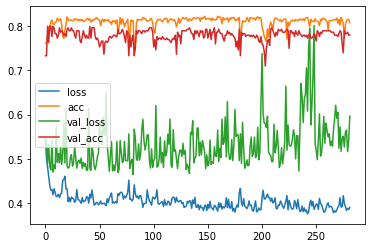

In [169]:
model_loss.plot()

In [170]:
predictions_test = model.predict(X_test)
rounded_test = [round(x[0]) for x in predictions_test]

In [171]:
_, accuracy = model.evaluate(X_train2, y_train2, verbose=0)
accuracy

0.8157143

In [180]:
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
accuracy

0.78

In [181]:
from sklearn.metrics import classification_report, confusion_matrix

In [182]:
predictions = model.predict_classes(X_test)

In [183]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       220
         1.0       0.59      0.59      0.59        80

    accuracy                           0.78       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.78      0.78      0.78       300



In [184]:
print(confusion_matrix(y_test, predictions))

[[187  33]
 [ 33  47]]


Conclusión: 
- Obtenemos una precisión del 81 en el train y 78 en el test que se considera como aceptable.